<a href="https://colab.research.google.com/github/nuriamontala/PYT-SBI/blob/main/model_and_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OPEN GRAPHS FOLDER

In [1]:
!unzip -o "/content/drive/MyDrive/SBI_PYT_def/graphs/protein_graphs.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/protein_graphs/4j79.pt  
  inflating: /content/protein_graphs/4j7i.pt  
  inflating: /content/protein_graphs/4j81.pt  
  inflating: /content/protein_graphs/4j82.pt  
  inflating: /content/protein_graphs/4j84.pt  
  inflating: /content/protein_graphs/4j86.pt  
  inflating: /content/protein_graphs/4j8b.pt  
  inflating: /content/protein_graphs/4j8g.pt  
  inflating: /content/protein_graphs/4j8s.pt  
  inflating: /content/protein_graphs/4j8t.pt  
  inflating: /content/protein_graphs/4jai.pt  
  inflating: /content/protein_graphs/4jaj.pt  
  inflating: /content/protein_graphs/4jaz.pt  
  inflating: /content/protein_graphs/4jbo.pt  
  inflating: /content/protein_graphs/4jbp.pt  
  inflating: /content/protein_graphs/4jbs.pt  
  inflating: /content/protein_graphs/4jc1.pt  
  inflating: /content/protein_graphs/4jck.pt  
  inflating: /content/protein_graphs/4jda.pt  
  inflating: /content/protein_graphs/4jdf.pt  
  inflati

CLASSIFICATION OF PROTEINS

In [ ]:
import os
import requests
import csv

# Ruta a tu carpeta con los archivos .pt
folder_path = "protein_graphs"  # <-- Cambia esto a tu ruta real
output_csv = "pdb_classifications.csv"

def get_pdb_classification(pdb_code):
    url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb_code.lower()}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data.get("struct_keywords", {}).get("pdbx_keywords", "Unknown")
        else:
            return "Not Found"
    except Exception as e:
        return "Error"

def main():
    pdb_codes = [f[:-3] for f in os.listdir(folder_path) if f.endswith(".pt")]
    results = []

    print(f"Found {len(pdb_codes)} graph files.")

    for pdb in pdb_codes:
        classification = get_pdb_classification(pdb)
        print(f"{pdb}: {classification}")
        results.append((pdb, classification))

    with open(output_csv, mode='w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['pdb_code', 'classification'])
        writer.writerows(results)

    print(f"\n✅ CSV file saved to: {output_csv}")

if __name__ == "__main__":
    main()


Streaming output truncated to the last 5000 lines.
2jal: HYDROLASE
3zcz: HYDROLASE
5xbt: DNA BINDING PROTEIN
3qri: TRANSFERASE/TRANSFERASE INHIBITOR
4hev: HYDROLASE/HYDROLASE INHIBITOR
6jki: TRANSFERASE
2z9g: HYDROLASE
5npf: HYDROLASE
5elv: MEMBRANE PROTEIN
4dpf: Hydrolase/Hydrolase inhibitor
2fv9: HYDROLASE
4ifh: HYDROLASE/HYDROLASE INHIBITOR
5yy4: IMMUNE SYSTEM
4oex: HYDROLASE/HYDROLASE INHIBITOR
5ovi: SIGNALING PROTEIN
5e8a: SUGAR BINDING PROTEIN/INHIBITOR
5ef8: HYDROLASE/HYDROLASE INHIBITOR
4pgb: IMMUNE SYSTEM/PEPTIDE
3avm: RECOMBINATION/INHIBITOR
4gtq: TRANSFERASE/TRANSFERASE INHIBITOR
3km4: HYDROLASE/HYDROLASE INHIBITOR
4y2s: OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR
2rip: HYDROLASE
1ag9: ELECTRON TRANSPORT
3otf: TRANSPORT PROTEIN
2f5t: TRANSCRIPTION
5nra: HYDROLASE
2o9k: GENE REGULATION
3fea: CELL CYCLE
1yid: LIGASE
3mj2: TRANSFERASE
6q6o: TRANSCRIPTION
4k9g: ISOMERASE
2ojf: TRANSFERASE
4x1f: GENE REGULATION
2yig: HYDROLASE
5gp7: TRANSFERASE
3eg6: PROTEIN BINDING
6cha: HYDROLASE (

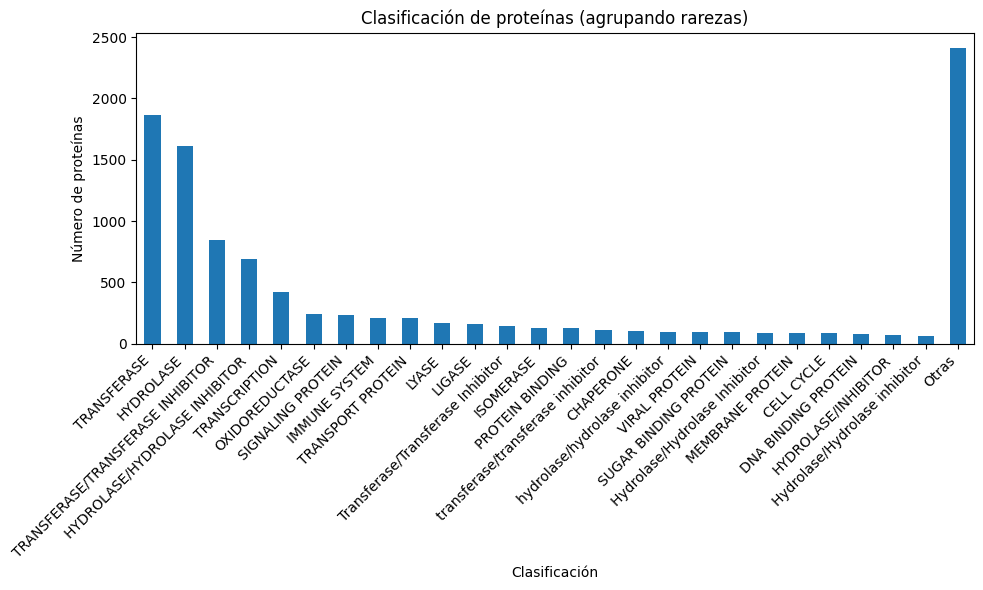

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al CSV generado
csv_file = "pdb_classifications.csv"

# Leer el archivo
df = pd.read_csv(csv_file)

# Contar ocurrencias de cada clasificación
classification_counts = df['classification'].value_counts()

top_n = 25
top = classification_counts.head(top_n)
others_sum = classification_counts.iloc[top_n:].sum()
top["Otras"] = others_sum

plt.figure(figsize=(10, 6))
top.plot(kind='bar')
plt.title('Clasificación de proteínas (agrupando rarezas)')
plt.xlabel('Clasificación')
plt.ylabel('Número de proteínas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("classification_barplot_grouped.png")
plt.show()





In [2]:
# Uninstall current versions
!pip uninstall torch torch-scatter torch-sparse torch-geometric torch-cluster torch-spline-conv -y

# Install PyTorch 2.2.0 + CUDA 11.8
!pip install torch==2.2.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install PyTorch Geometric dependencies
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.2.0+cu118.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.2.0+cu118.html

# Finally, install torch-geometric and torch_geometric
!pip install torch-geometric
!pip install torch_geometric

Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.7/811.7 MB 735.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 611.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 1.7 MB/s eta 0:0

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GATConv
import pandas as pd
import os
import torch.nn.functional as F
from torch_scatter import scatter_mean, scatter_sum
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ✅ Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0
        self.best_model_state = None

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.best_model_state = model.state_dict()
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.best_model_state = model.state_dict()
            self.counter = 0

    def load_best_model(self, model):
        model.load_state_dict(self.best_model_state)


# Improved Dataset class with statistics and class weight calculation
class ProteinGraphDataset(Dataset):
    def __init__(self, graph_folder, transform=None, pre_transform=None, pre_filter=None, cache_data=False):
        super().__init__(transform, pre_transform, pre_filter)
        self.graph_folder = graph_folder
        self.graph_files = [os.path.join(graph_folder, f) for f in os.listdir(graph_folder) if f.endswith(".pt")]

        # Optional caching for faster access
        self.cache_data = cache_data
        self._cache = {}

    def __len__(self):
        return len(self.graph_files)

    def __getitem__(self, idx):
        if self.cache_data and idx in self._cache:
            return self._cache[idx]

        try:
            data = torch.load(self.graph_files[idx])

            # Ensure batch attribute exists for virtual node implementation
            if not hasattr(data, 'batch') or data.batch is None:
                data.batch = torch.zeros(data.num_nodes, dtype=torch.long)

            # Apply any transforms
            if self.transform is not None:
                data = self.transform(data)

            # Cache if enabled
            if self.cache_data:
                self._cache[idx] = data

            return data
        except Exception as e:
            print(f"Error loading file {self.graph_files[idx]}: {e}")
            raise

    def get_class_weights(self):
        """Calculate class weights for handling imbalanced data."""
        all_labels = []
        for i in range(min(100, len(self))):  # Sample for efficiency
            data = self[i]
            all_labels.extend(data.y.tolist())

        # Count occurrences of each class
        label_counts = np.bincount(all_labels)
        n_samples = len(all_labels)
        n_classes = len(label_counts)

        # Weighted inversely proportional to class frequencies
        weights = n_samples / (n_classes * label_counts)
        return torch.FloatTensor(weights)

class FeatureAttention(nn.Module):
    def __init__(self, in_features):
        super(FeatureAttention, self).__init__()
        # Parámetros de atención por feature, inicializados a 1.0
        self.attn_weights = nn.Parameter(torch.ones(in_features))

    def forward(self, x):
        # x: [num_nodes, in_features]
        return x * self.attn_weights

# Improved Virtual Node GAT Model with proper message passing
class ImprovedGATVirtualNode(nn.Module):
    def __init__(self, in_features, hidden_dim, num_heads, num_classes, dropout=0.2,
                 residual=True, batch_norm=True):
        super(ImprovedGATVirtualNode, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.residual = residual
        self.batch_norm = batch_norm
        self.feature_attention = FeatureAttention(in_features)

        # Virtual node embedding
        self.virtual_node_embedding = nn.Parameter(torch.zeros(1, hidden_dim))

        # Virtual node update MLP
        self.virtual_node_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # Graph Attention Layers
        self.gat1 = GATConv(in_features, hidden_dim // num_heads, heads=num_heads)
        self.gat2 = GATConv(hidden_dim, hidden_dim // num_heads, heads=num_heads)

        # Node-to-virtual message passing
        self.node_to_virtual = nn.Linear(hidden_dim, hidden_dim)

        # Virtual-to-node message passing
        self.virtual_to_node = nn.Linear(hidden_dim, hidden_dim)

        # MLP Classifier for node classification
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes)
        )

        # Optional BatchNorm layers
        if batch_norm:
            self.bn1 = nn.BatchNorm1d(hidden_dim)
            self.bn2 = nn.BatchNorm1d(hidden_dim)

        self.dropout = nn.Dropout(dropout)

        # Store attention weights for interpretability
        self.attention_weights = None

    def reset_parameters(self):
        """Reset all learnable parameters."""
        if hasattr(self, 'bn1'):
            self.bn1.reset_parameters()
            self.bn2.reset_parameters()

        self.gat1.reset_parameters()
        self.gat2.reset_parameters()

        # Reset virtual node embedding
        nn.init.zeros_(self.virtual_node_embedding)

        # Reset MLP layers
        for layer in self.virtual_node_mlp:
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

        for layer in self.mlp:
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

        self.node_to_virtual.reset_parameters()
        self.virtual_to_node.reset_parameters()

    def forward(self, data):

        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.feature_attention(x)


        # Ensure batch tensor exists
        if batch is None:
            batch = torch.zeros(x.size(0), dtype=torch.long, device=x.device)

        # Get number of graphs in batch
        num_graphs = batch.max().item() + 1

        # Virtual node initial state
        virtual_node = self.virtual_node_embedding.expand(num_graphs, -1)

        # First GAT layer with attention weights capture
        x1, attention_weights1 = self.gat1(x, edge_index, return_attention_weights=True)
        x1 = F.relu(x1)

        if self.batch_norm:
            x1 = self.bn1(x1)

        x1 = self.dropout(x1)

        # Virtual node aggregation (nodes → virtual)
        virtual_node_temp = scatter_mean(self.node_to_virtual(x1), batch, dim=0)
        virtual_node = virtual_node + self.virtual_node_mlp(virtual_node_temp)

        # Virtual node messaging (virtual → nodes)
        virtual_node_features = self.virtual_to_node(virtual_node)[batch]

        # Add virtual node features to node embeddings
        x1 = x1 + virtual_node_features

        # Second GAT layer
        x2, attention_weights2 = self.gat2(x1, edge_index, return_attention_weights=True)

        # Store attention weights for interpretability
        self.attention_weights = (attention_weights1, attention_weights2)

        x2 = F.relu(x2)

        if self.batch_norm:
            x2 = self.bn2(x2)

        x2 = self.dropout(x2)

        # Residual connection if enabled
        if self.residual and x.size(1) == self.hidden_dim:
            x2 = x2 + x

        # Final node classification
        out = self.mlp(x2)

        return out

    def get_attention_weights(self):
        """Return attention weights for interpretability."""
        return self.attention_weights


# Improved Early Stopping with validation metrics monitoring
class ImprovedEarlyStopping:
    def __init__(self, patience=5, delta=0, verbose=True, path='best_model.pt', metric_name='val_loss',
                 mode='min'):
        """
        Args:
            patience: Number of epochs with no improvement
            delta: Minimum change in monitored quantity to qualify as improvement
            verbose: If True, prints a message for each improvement
            path: Path to save the best model
            metric_name: Name of the metric to monitor
            mode: 'min' or 'max' (whether to minimize or maximize the metric)
        """
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.path = path
        self.metric_name = metric_name
        self.mode = mode
        self.best_score = None
        self.early_stop = False
        self.counter = 0
        self.best_model_state = None

        # Set the appropriate comparison function
        self.improved = self._improvement_func()

    def _improvement_func(self):
        """Return the appropriate improvement function based on mode."""
        if self.mode == 'min':
            return lambda current, best: current < best - self.delta
        else:  # mode == 'max'
            return lambda current, best: current > best + self.delta

    def __call__(self, metrics, model):
        """
        Args:
            metrics: Dictionary of metrics
            model: Model to save
        """
        current = metrics[self.metric_name]

        if self.best_score is None:
            self.best_score = current
            self.save_checkpoint(metrics, model)
        elif not self.improved(current, self.best_score):
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = current
            self.save_checkpoint(metrics, model)
            self.counter = 0

    def save_checkpoint(self, metrics, model):
        """Save model when validation performance improves."""
        if self.verbose:
            print(f'Validation {self.metric_name} {"decreased" if self.mode == "min" else "increased"} '
                  f'({self.best_score:.6f} -> {metrics[self.metric_name]:.6f}). Saving model...')

        self.best_model_state = model.state_dict()
        torch.save(self.best_model_state, self.path)

    def load_best_model(self, model):
        """Load the best model."""
        model.load_state_dict(self.best_model_state)


# Focal Loss for handling class imbalance
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        """
        Args:
            alpha: Weight factor for each class
            gamma: Focusing parameter
            reduction: 'none', 'mean', or 'sum'
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        Args:
            inputs: Predicted logits (before softmax)
            targets: Ground truth labels
        """
        log_probs = F.log_softmax(inputs, dim=1)
        probs = torch.exp(log_probs)

        # Get probability for the correct class
        target_probs = probs.gather(1, targets.unsqueeze(1))
        target_probs = target_probs.squeeze(1)

        # Apply focusing parameter
        focal_weight = (1 - target_probs) ** self.gamma

        # Apply class weights if provided
        if self.alpha is not None:
            focal_weight = focal_weight * self.alpha[targets]

        loss = -focal_weight * log_probs.gather(1, targets.unsqueeze(1))
        loss = loss.squeeze(1)

        if self.reduction == 'none':
            return loss
        elif self.reduction == 'mean':
            return loss.mean()
        else:  # self.reduction == 'sum'
            return loss.sum()


# Comprehensive evaluation function
def evaluate_model(model, loader, device, criterion=None):
    """Comprehensive model evaluation with multiple metrics."""
    model.eval()
    total_loss = 0.0
    all_preds = []
    all_labels = []
    all_scores = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)

            # Forward pass
            out = model(data)

            # Compute loss if criterion is provided
            if criterion is not None:
                loss = criterion(out, data.y)
                total_loss += loss.item() * data.num_nodes

            # Get predictions and probabilities
            probs = F.softmax(out, dim=1)
            preds = out.argmax(dim=1)

            # Store predictions, labels, and scores
            all_preds.append(preds.cpu().numpy())
            all_labels.append(data.y.cpu().numpy())
            all_scores.append(probs[:, 1].cpu().numpy())  # Probability of positive class

    # Concatenate results
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    all_scores = np.concatenate(all_scores)

    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds, zero_division=0),
        'recall': recall_score(all_labels, all_preds, zero_division=0),
        'f1': f1_score(all_labels, all_preds, zero_division=0),
        'auc': roc_auc_score(all_labels, all_scores) if len(np.unique(all_labels)) > 1 else 0.5
    }

    # Add loss if calculated
    if criterion is not None:
        metrics['loss'] = total_loss / len(all_labels)

    return metrics


# Feature importance analysis function
def analyze_feature_importance(model, loader, device, feature_names=None):
    """Analyze feature importance using gradient-based approach."""
    model.train()  # Need gradients
    feature_gradients = []

    for data in loader:
        data = data.to(device)

        # Enable gradients for input features
        data.x.requires_grad_(True)

        # Forward pass
        out = model(data)

        # Compute gradient w.r.t positive class score
        positive_class_score = out[:, 1].sum()
        positive_class_score.backward()

        # Store gradients
        feature_gradients.append(data.x.grad.abs().mean(dim=0).cpu().numpy())

        # Reset gradients
        data.x.grad = None

    # Average gradients across batches
    avg_gradients = np.mean(feature_gradients, axis=0)

    # Create feature importance dictionary
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(len(avg_gradients))]

    importance_dict = dict(zip(feature_names, avg_gradients))

    # Sort by importance
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

    return sorted_importance


# K-fold cross-validation function
def kfold_cross_validation(dataset, model_class, model_kwargs, train_kwargs,
                           n_splits=5, seed=42, class_weights=None):
    """Perform k-fold cross-validation."""
    from sklearn.model_selection import KFold

    # Initialize k-fold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    # Get all indices
    indices = list(range(len(dataset)))

    # Store results
    fold_results = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(indices)):
        print(f"Fold {fold+1}/{n_splits}")

        # Create data loaders
        train_subset = torch.utils.data.Subset(dataset, train_idx)
        test_subset = torch.utils.data.Subset(dataset, test_idx)

        train_loader = DataLoader(train_subset, batch_size=train_kwargs.get('batch_size', 8),
                                 shuffle=True)
        test_loader = DataLoader(test_subset, batch_size=train_kwargs.get('batch_size', 8),
                                shuffle=False)

        # Initialize model
        model = model_class(**model_kwargs)

        # Train model
        # Implement your training function here
        # Define device
        device = train_kwargs.get('device', 'cuda' if torch.cuda.is_available() else 'cpu')

        # Define loss, optimizer, early stopping
        weights = class_weights
        criterion = FocalLoss(alpha=weights)
        optimizer = optim.Adam(model.parameters(), lr=train_kwargs.get('lr', 1e-3))
        early_stopping = ImprovedEarlyStopping(patience=5, path=f"best_model_fold{fold}.pt", metric_name='loss', mode='min')

        # Entrenar
        model = train_model(model, train_loader, test_loader, device, criterion, optimizer, early_stopping,
                            num_epochs=train_kwargs.get('num_epochs', 50))

        # Evaluate model
        metrics = evaluate_model(model, test_loader, train_kwargs.get('device'))

        fold_results.append(metrics)

        print(f"Fold {fold+1} results: {metrics}")

    # Calculate average results
    avg_results = {k: np.mean([r[k] for r in fold_results]) for k in fold_results[0].keys()}
    std_results = {k: np.std([r[k] for r in fold_results]) for k in fold_results[0].keys()}

    print(f"Average results: {avg_results}")
    print(f"Standard deviation: {std_results}")

    return fold_results, avg_results, std_results

#Faltaba por definir el training loop, se lo he pedido al chat
# Entrenamiento por épocas con validación y early stopping
def train_model(model, train_loader, val_loader, device, criterion, optimizer, early_stopping, num_epochs=50):
    """Entrena el modelo con validación y early stopping."""
    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * data.num_nodes

        train_loss = total_loss / len(train_loader.dataset)

        # Evaluación en conjunto de validación
        val_metrics = evaluate_model(model, val_loader, device, criterion=criterion)
        print(f"Epoch {epoch+1:03d}: Train Loss: {train_loss:.4f} | Val Loss: {val_metrics['loss']:.4f} | Val F1: {val_metrics['f1']:.4f}")

        # Aplicar early stopping
        early_stopping(val_metrics, model)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break

    # Cargar el mejor modelo guardado
    early_stopping.load_best_model(model)
    return model
from sklearn.model_selection import train_test_split

# 1️⃣ Cargar el dataset completo
dataset = ProteinGraphDataset("protein_graphs")

# 2️⃣ Dividir en training y test final
indices = list(range(len(dataset)))
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
final_test_dataset = torch.utils.data.Subset(dataset, test_indices)

# 3️⃣ Definir clases y parámetros del modelo
model_class = ImprovedGATVirtualNode
model_kwargs = {
    'in_features': 68,  # ajusta según tus features
    'hidden_dim': 64,
    'num_heads': 4,
    'num_classes': 2
}
train_kwargs = {
    'batch_size': 8,
    'lr': 1e-3,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',
    'num_epochs': 50
}

class_weights = dataset.get_class_weights().to(train_kwargs["device"])

# 4️⃣ Validación cruzada en training set
print("🔁 Iniciando validación cruzada en el training set...")
cv_results, avg, std = kfold_cross_validation(train_dataset, model_class, model_kwargs, train_kwargs, class_weights=class_weights)
# 5️⃣ Entrenar modelo final con todo el training set
print("🚀 Entrenando modelo final con todo el training set...")
final_model = model_class(**model_kwargs).to(train_kwargs["device"])
weights = class_weights
criterion = FocalLoss(alpha=class_weights)
optimizer = optim.Adam(final_model.parameters(), lr=train_kwargs["lr"])
early_stopping = ImprovedEarlyStopping(patience=5, path="final_model.pt", metric_name='loss', mode='min')

final_model = train_model(
    final_model,
    DataLoader(train_dataset, batch_size=train_kwargs["batch_size"], shuffle=True),
    DataLoader(final_test_dataset, batch_size=train_kwargs["batch_size"], shuffle=False),
    train_kwargs["device"],
    criterion,
    optimizer,
    early_stopping,
    num_epochs=train_kwargs["num_epochs"]
)

# 6️⃣ Evaluar en el test final (nunca usado antes)
print("🧪 Evaluando en el test final nunca visto...")
final_test_metrics = evaluate_model(
    final_model,
    DataLoader(final_test_dataset, batch_size=train_kwargs["batch_size"]),
    train_kwargs["device"]
)

print("\n🎯 Métricas en test final:")
for k, v in final_test_metrics.items():
    print(f"{k}: {v:.4f}")


import random

print("\n🔍 Mostrando predicciones de binding sites para 10 proteínas del test final:\n")

# Seleccionar 10 índices aleatorios del conjunto de test
sample_indices = random.sample(range(len(final_test_dataset)), 10)

for i, idx in enumerate(sample_indices, 1):
    data = final_test_dataset[idx].to(train_kwargs["device"])
    model_output = final_model(data)
    predictions = model_output.argmax(dim=1).cpu().numpy()
    true_labels = data.y.cpu().numpy()

    predicted_binding_sites = [i for i, pred in enumerate(predictions) if pred == 1]
    true_binding_sites = [i for i, true in enumerate(true_labels) if true == 1]

    print(f"🧬 Proteína {i} (index {idx}):")
    print(f"   ✅ Sitios de unión reales:    {true_binding_sites}")
    print(f"   🔮 Sitios de unión predichos: {predicted_binding_sites}\n")


🔁 Iniciando validación cruzada en el training set...
Fold 1/5
Epoch 001: Train Loss: 33.1930 | Val Loss: 0.0693 | Val F1: 0.3972
Validation loss decreased (0.069318 -> 0.069318). Saving model...
Epoch 002: Train Loss: 27.4884 | Val Loss: 0.0656 | Val F1: 0.4149
Validation loss decreased (0.065577 -> 0.065577). Saving model...
Epoch 003: Train Loss: 25.8781 | Val Loss: 0.0583 | Val F1: 0.4476
Validation loss decreased (0.058336 -> 0.058336). Saving model...
Epoch 004: Train Loss: 24.4627 | Val Loss: 0.0561 | Val F1: 0.4542
Validation loss decreased (0.056052 -> 0.056052). Saving model...
Epoch 005: Train Loss: 23.7884 | Val Loss: 0.0599 | Val F1: 0.4243
EarlyStopping counter: 1 out of 5
Epoch 006: Train Loss: 22.9422 | Val Loss: 0.0542 | Val F1: 0.4546
Validation loss decreased (0.054225 -> 0.054225). Saving model...
Epoch 007: Train Loss: 22.5409 | Val Loss: 0.0508 | Val F1: 0.4748
Validation loss decreased (0.050778 -> 0.050778). Saving model...
Epoch 008: Train Loss: 22.2047 | Val Lo

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001: Train Loss: 33.0846 | Val Loss: 0.0739 | Val F1: 0.3789
Validation loss decreased (0.073870 -> 0.073870). Saving model...
Epoch 002: Train Loss: 28.9053 | Val Loss: 0.0680 | Val F1: 0.3980
Validation loss decreased (0.067954 -> 0.067954). Saving model...
Epoch 003: Train Loss: 26.6581 | Val Loss: 0.0650 | Val F1: 0.4044
Validation loss decreased (0.064967 -> 0.064967). Saving model...
Epoch 004: Train Loss: 25.1485 | Val Loss: 0.0755 | Val F1: 0.3610
EarlyStopping counter: 1 out of 5
Epoch 005: Train Loss: 24.3978 | Val Loss: 0.0594 | Val F1: 0.4386
Validation loss decreased (0.059428 -> 0.059428). Saving model...
Epoch 006: Train Loss: 23.7088 | Val Loss: 0.0655 | Val F1: 0.3892
EarlyStopping counter: 1 out of 5
Epoch 007: Train Loss: 23.1337 | Val Loss: 0.0553 | Val F1: 0.4459
Validation loss decreased (0.055336 -> 0.055336). Saving model...
Epoch 008: Train Loss: 22.4785 | Val Loss: 0.0555 | Val F1: 0.4361
EarlyStopping counter: 1 out of 5
Epoch 009: Train Loss: 22.1894 |

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001: Train Loss: 33.8020 | Val Loss: 0.0711 | Val F1: 0.3954
Validation loss decreased (0.071055 -> 0.071055). Saving model...
Epoch 002: Train Loss: 28.1811 | Val Loss: 0.0651 | Val F1: 0.4173
Validation loss decreased (0.065069 -> 0.065069). Saving model...
Epoch 003: Train Loss: 26.3759 | Val Loss: 0.0601 | Val F1: 0.4278
Validation loss decreased (0.060054 -> 0.060054). Saving model...
Epoch 004: Train Loss: 24.7699 | Val Loss: 0.0572 | Val F1: 0.4394
Validation loss decreased (0.057201 -> 0.057201). Saving model...
Epoch 005: Train Loss: 23.9889 | Val Loss: 0.0617 | Val F1: 0.4102
EarlyStopping counter: 1 out of 5
Epoch 006: Train Loss: 23.4430 | Val Loss: 0.0545 | Val F1: 0.4593
Validation loss decreased (0.054465 -> 0.054465). Saving model...
Epoch 007: Train Loss: 22.7075 | Val Loss: 0.0521 | Val F1: 0.4654
Validation loss decreased (0.052057 -> 0.052057). Saving model...
Epoch 008: Train Loss: 22.2058 | Val Loss: 0.0501 | Val F1: 0.4754
Validation loss decreased (0.05009

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001: Train Loss: 33.5105 | Val Loss: 0.0709 | Val F1: 0.3995
Validation loss decreased (0.070873 -> 0.070873). Saving model...
Epoch 002: Train Loss: 27.5888 | Val Loss: 0.0629 | Val F1: 0.4264
Validation loss decreased (0.062869 -> 0.062869). Saving model...
Epoch 003: Train Loss: 25.6638 | Val Loss: 0.0607 | Val F1: 0.4327
Validation loss decreased (0.060686 -> 0.060686). Saving model...
Epoch 004: Train Loss: 24.4616 | Val Loss: 0.0638 | Val F1: 0.4179
EarlyStopping counter: 1 out of 5
Epoch 005: Train Loss: 23.5139 | Val Loss: 0.0547 | Val F1: 0.4642
Validation loss decreased (0.054716 -> 0.054716). Saving model...
Epoch 006: Train Loss: 23.1044 | Val Loss: 0.0653 | Val F1: 0.4016
EarlyStopping counter: 1 out of 5
Epoch 007: Train Loss: 22.5909 | Val Loss: 0.0597 | Val F1: 0.4261
EarlyStopping counter: 2 out of 5
Epoch 008: Train Loss: 22.1331 | Val Loss: 0.0539 | Val F1: 0.4608
Validation loss decreased (0.053896 -> 0.053896). Saving model...
Epoch 009: Train Loss: 21.7927 |

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001: Train Loss: 33.3957 | Val Loss: 0.0667 | Val F1: 0.3913
Validation loss decreased (0.066721 -> 0.066721). Saving model...
Epoch 002: Train Loss: 27.9724 | Val Loss: 0.0647 | Val F1: 0.3978
Validation loss decreased (0.064711 -> 0.064711). Saving model...
Epoch 003: Train Loss: 26.0417 | Val Loss: 0.0585 | Val F1: 0.4235
Validation loss decreased (0.058490 -> 0.058490). Saving model...
Epoch 004: Train Loss: 24.8363 | Val Loss: 0.0560 | Val F1: 0.4335
Validation loss decreased (0.056046 -> 0.056046). Saving model...
Epoch 005: Train Loss: 24.0024 | Val Loss: 0.0593 | Val F1: 0.4166
EarlyStopping counter: 1 out of 5
Epoch 006: Train Loss: 23.4552 | Val Loss: 0.0566 | Val F1: 0.4218
EarlyStopping counter: 2 out of 5
Epoch 007: Train Loss: 22.6619 | Val Loss: 0.0527 | Val F1: 0.4537
Validation loss decreased (0.052679 -> 0.052679). Saving model...
Epoch 008: Train Loss: 22.2474 | Val Loss: 0.0521 | Val F1: 0.4525
Validation loss decreased (0.052119 -> 0.052119). Saving model...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 001: Train Loss: 32.9635 | Val Loss: 0.0656 | Val F1: 0.4019
Validation loss decreased (0.065571 -> 0.065571). Saving model...
Epoch 002: Train Loss: 27.1548 | Val Loss: 0.0618 | Val F1: 0.4170
Validation loss decreased (0.061848 -> 0.061848). Saving model...
Epoch 003: Train Loss: 25.3055 | Val Loss: 0.0568 | Val F1: 0.4359
Validation loss decreased (0.056841 -> 0.056841). Saving model...
Epoch 004: Train Loss: 24.2260 | Val Loss: 0.0536 | Val F1: 0.4486
Validation loss decreased (0.053563 -> 0.053563). Saving model...
Epoch 005: Train Loss: 23.4396 | Val Loss: 0.0551 | Val F1: 0.4402
EarlyStopping counter: 1 out of 5
Epoch 006: Train Loss: 22.6070 | Val Loss: 0.0528 | Val F1: 0.4564
Validation loss decreased (0.052800 -> 0.052800). Saving model...
Epoch 007: Train Loss: 22.2034 | Val Loss: 0.0532 | Val F1: 0.4476
EarlyStopping counter: 1 out of 5
Epoch 008: Train Loss: 21.8355 | Val Loss: 0.0558 | Val F1: 0.4295
EarlyStopping counter: 2 out of 5
Epoch 009: Train Loss: 21.5628 |

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)



🎯 Métricas en test final:
accuracy: 0.8482
precision: 0.3331
recall: 0.7439
f1: 0.4601
auc: 0.8875

🔍 Mostrando predicciones de binding sites para 10 proteínas del test final:

🧬 Proteína 1 (index 120):
   ✅ Sitios de unión reales:    [62, 100, 101, 102, 103, 104, 109, 112, 113, 114, 118, 122, 125, 143, 146, 195, 196, 199, 200, 201, 204, 205, 215, 221, 249]
   🔮 Sitios de unión predichos: [8, 11, 63, 88, 89, 90, 95, 96, 97, 98, 99, 100, 101, 102, 103, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 146, 147, 148, 150, 154, 155, 156, 157, 160, 198, 199, 201, 202, 204, 205, 220, 221, 222, 223, 249, 250, 251, 252, 253, 254, 257, 259, 260, 264, 303, 313]

🧬 Proteína 2 (index 43):
   ✅ Sitios de unión reales:    [14, 16, 17, 18, 19, 24, 25, 26, 31, 35, 52, 53, 55, 58, 59, 64, 70, 71, 82, 85, 86, 87, 88, 118, 120, 122, 123, 126, 127, 128, 133, 137, 143, 145, 146, 148]
   🔮 Sitios de unión predichos: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26